# 1.C: Frequentist analysis of the radioactivity experiment (1 parameter)

**Question:** What is the activity of this radioactive source? 

Since the outcome of the experiment is unpredictable, the answer to the question can only be probabilistic, not definitive. Instead of a single value, a range of possible values must be given (an *interval*) along with a probability qualifier.

The method you use depends on your precise definition of probability. This tutorial shows the approach for Frequentist probability.

In [1]:
# Import modules needed for this tutorial

from trisep.RadioactiveSource import RadioactiveSource
from trisep.RadiationCounter import RadiationCounter, SimulatedRadiationCounter

import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background') # only include this if you use a dark background for Jupyter Lab

## Frequentist confidence interval

Suppose the experiment records 6 decays in 10 seconds:
- For some values for activity, the observation (6 counts) would seem anomalous 
  - For example, if the activity was 2 Bq, it would seem unusual to record 6 (or fewer) decays in 10 seconds

Simulated detector built. Counting time = 10.0 Efficiency = 1.0 Background rate= 0.0 (Hz)


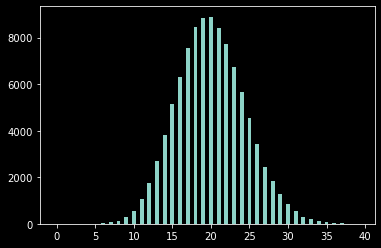

In [6]:
# Does it appear reasonable that the lab source activity is 0.6 Bq?
# Does it appear reasonable that the lab source activity is 2.0 Bq?

sim_source = RadioactiveSource(2.) # specifies the activity of simulated source
sim_detector = SimulatedRadiationCounter() # this is NOT the lab detector, just a simulation of a detector

sim_detector.insert_known_source(sim_source)
sim_detector.set_counting_time(10)

sim_counts = []
for i in range(100000):
    sim_detector.start()
    sim_counts.append(sim_detector.get_count())

plt.hist(sim_counts,bins=np.arange(0.,40.,0.5), align='left')
plt.show()

The likelihood to see 6 or fewer counts from a source of activity 2 Bq appears to be small indeed. How can we quantify that?




In [9]:
# Look to see how often such a small number of counts occur:

sim_source.set_activity(2.)

observed = 6
trials = 10000
low_counts = 0

for i in range(trials):
    sim_detector.start()
    if sim_detector.get_count() <= observed:
        low_counts += 1

    
    
print(observed,'or less counts occured in',low_counts,'of',trials,'trials')

6 or less counts occured in 1 of 10000 trials


## Upper confidence interval

A very small fraction of experiments with a 2 Bq source would see 6 or fewer counts.

This study is a one-sided test of the hypothesis that the source activity is 2 Bq. 
 - one-sided: Alternative hypotheses under consideration have activities lower than 2 Bq. 
 - in other words, only very low counts are considered to be anomalous

Review: Hypothesis tests

 - What is the p-value for this hypothesis test?
 - Is the 2 Bq hypothesis rejected at 95% CL?
 - What activity values are not rejected at 95% CL?
   - Those activity values constitute the *95% upper confidence interval*, $[0,a^{upper}_{95}]$.
   
Confidence intervals are produced by following a recipe like this, decided upon before seeing data. The recipe is valid provided that
at least 95% of intervals contain the true value, if the model is correct.

For this example, if the true activity happens to be $a^{upper}_{95}$, the hypothesis test rejects the true hypothesis exactly 5% of repeated experiments. It is for those rare outcomes that the reported interval will not contain the true value, whereas the other experiments will report an interval containing the true value.

**Question**: What about for other possible true values for the activity?

**Answer**: 

In [10]:
# Copy the code above (or probability distribution app) to calculate the probability that the true activity 
# is in the 95% upper confidence interval for  true activity = 1.1 and 1.25

# First work out:
# What is the 95% CL upper limit if 5 counts are recorded?  Answer: 
# What is the 95% CL upper limit if 6 counts are recorded?  Answer: 1.18
# What is the 95% CL upper limit if 7 counts are recorded?  Answer: 

# Then work out:
# What is the probability that true activity = 1.1 will be in 95% upper confidence interval? Answer: 
# What is the probability that true activity = 1.18 will be in 95% upper confidence interval? Answer: 95%
# What is the probability that true activity = 1.25 will be in 95% upper confidence interval? Answer: 

def get_upper_limit(low=0.1, high=2, step=0.01, observed=5, trials=10000):
    activities = np.arange(low, high, step)
    p_values = np.empty_like(activities)
    closest_index = -1
    for i, activity in enumerate(np.arange(low, high, step)):
        sim_source.set_activity(activity)
        low_counts = 0
        for _ in range(trials):
            sim_detector.start()
            if sim_detector.get_count() <= observed:
                low_counts += 1
        p_values[i] = low_counts / trials
        if p_values[i] > 0.5:
            print('fix me!')
        print(observed,'or less counts occured in',low_counts,'of',trials,'trials')
    return p_values

6 or less counts occured in 501 of 10000 trials


## Lower confidence interval and central confidence interval

Follow the same approach, this time considering alternative hypotheses having higher actvities.

The 95% lower confidence interval is $[a^{lower}_{95},\infty]$.

The 90% central confidence interval is $[a^{lower}_{95},a^{upper}_{95}]$.

## Frequentist central confidence interval - Summary

The 90% central confidence interval is bounded by the 95% confidence lower limit
and the 95% confidence level upper limit.

The rigorous interval is [0.26,1.18]
which is close to the approximate interval that was found to be [0.28,1.10].
See page 280 of reference notes.

The result of this analysis can reported as $0.60^{+0.58}_{-0.34}$ at the 90% confidence level.

**Question**: Can you form a sentence that clearly explains what that means,
using the word "probability" and 90%?